### Titanic - Machine Learning from Disaster

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [2]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 76.4+ KB


In [31]:
df_TFD_tt = df_titanic[['Age', 'Sex', 'Ticket','Fare','Embarked','Survived','Pclass' ]]
df_TFD_tt

NameError: name 'df_titanic' is not defined

In [5]:
df_TFD['Survived']=df_TFD['Survived'].astype(object)
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
df_TFD = df_TFD.drop(columns = ['Cabin','Age'])

In [7]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.7+ KB


In [8]:
df_TFD = df_TFD.dropna()

In [9]:
df_TFD['Pclass'] = df_TFD['Pclass'].astype(object)

In [10]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 76.4+ KB


### 타이타닉 데이터로부터의 생존 예측 상관 관계  확인 (스토리)
- 목표변수 : 'Survived' - 분포 언발란스 (연속형: 정규화 확인, 범주형: 밸런스 확인유무) 
- 설명변수:  연속형 범주형 섞어서 7개 이상 
    - 'Age' : 연령에 따라,생존율이 달라짐. 
    - 'Sex' : 여성의 생존 확률이 높음. 
    - 'Ticket' : id값으로써 분석에는 의미가 없어보임
    - 'Fare'  : 높은 요금에 따라 생존률이 달라짐 
    - 'Embarked': 탑승 구역에 따른  생존률도 달라짐을 확인 
    - 'Pclass' :1st class 인 승객들의 생존률이 높음을 확인함. 
 
    
   

- 분석스토리 :  ※ 생존 예측 상관관계를 확인 결과, 생존에 영향을 미치는 것은 1등석 승객의 생존률이 높고, c 항구에서 탑승하도록 하는 것이 생존률이 높다. 

In [11]:
df_TFD_list = df_TFD.describe().columns.to_list()
df_TFD_list

['PassengerId', 'SibSp', 'Parch', 'Fare']

<Axes: xlabel='Survived', ylabel='SibSp'>

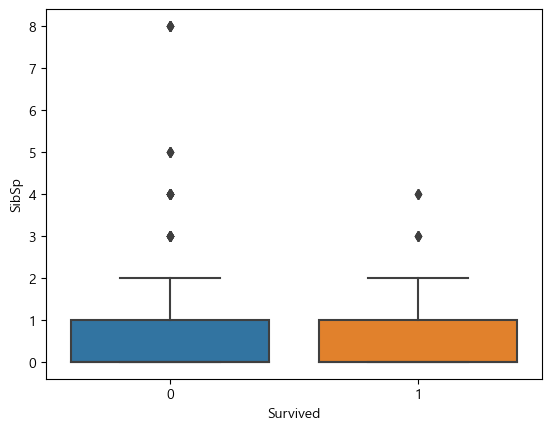

In [12]:
sns.boxplot(data=df_TFD, x='Survived', y='SibSp')

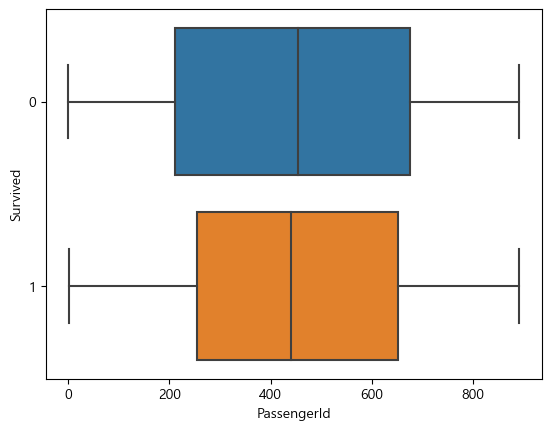

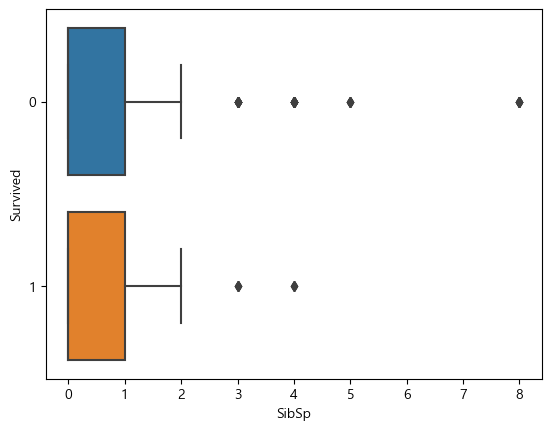

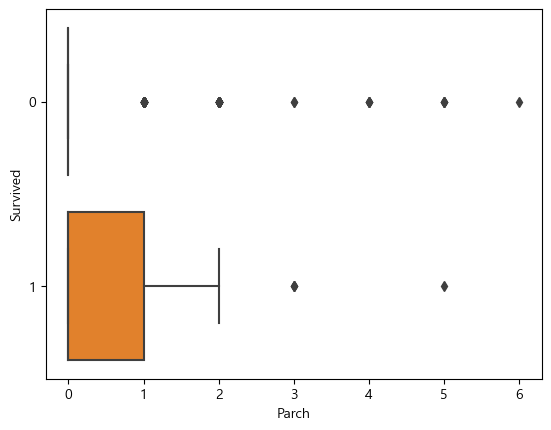

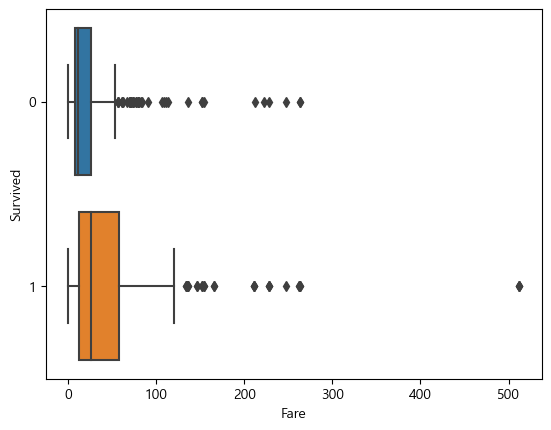

In [13]:
for item in df_TFD_list :
    sns.boxplot(data=df_TFD, x=item, y='Survived', orient='h')
    plt.show()

In [14]:
df_TFD['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
Q1 = df_TFD['Fare'].describe()['25%']
Q3 = df_TFD['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1,Q3,IQR

(7.8958, 31.0, 23.1042)

In [16]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(-26.7605, 65.6563)

In [17]:
condition = (df_TFD['Fare'] <= bound_up) #긍정 조건 변환
condition

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 889, dtype: bool

In [18]:
df_TFD_filter = df_TFD[condition]

<Axes: xlabel='Survived', ylabel='Fare'>

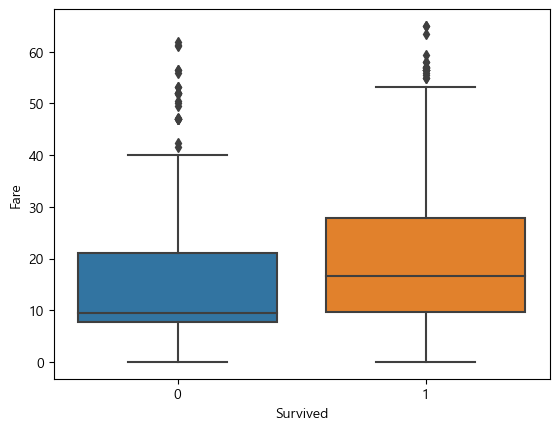

In [19]:
sns.boxplot(data=df_TFD_filter,x='Survived', y='Fare')

In [20]:
Q1 = df_TFD_filter['Fare'].describe()['25%']
Q3 = df_TFD_filter['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1,Q3,IQR

(7.8958, 26.0, 18.1042)

In [21]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(-19.260499999999997, 53.1563)

In [22]:
condition = (df_TFD_filter['Fare'] <= bound_up) #긍정 조건 변환
condition

0      True
2      True
3      True
4      True
5      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 775, dtype: bool

In [23]:
df_TFD_filter = df_TFD_filter[condition]

<Axes: xlabel='Survived', ylabel='Fare'>

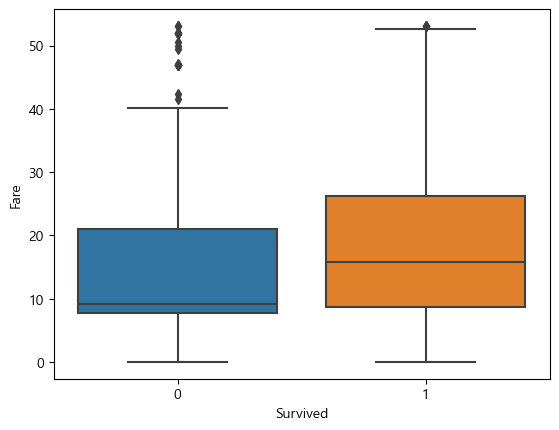

In [25]:
sns.boxplot(data = df_TFD_filter ,x='Survived', y='Fare')

In [26]:
Q1 = df_TFD_filter['Fare'].describe()['25%']
Q3 = df_TFD_filter['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1,Q3,IQR

(7.8958, 25.840625, 17.944824999999998)

In [27]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(-19.021437499999998, 52.7578625)

In [28]:
condition = (df_TFD_filter['Fare'] <= bound_up) #긍정 조건 변환
condition

0       True
2       True
3      False
4       True
5       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 750, dtype: bool

In [ ]:
df_ROS_refilter = df_ROS_filter[condition]
